# Alucar - Analisando as Vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [5]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
print('Quantidades de linhas e colunas: ', alucar.shape)

Quantidades de linhas e colunas:  (24, 2)


In [8]:
print('Quantidade de dados nnulos: ', alucar.isna().sum().sum())

Quantidade de dados nnulos:  0


In [10]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [11]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [13]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [14]:
print(sns.__version__)

0.9.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

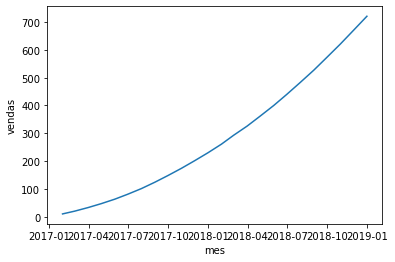

In [15]:
sns.lineplot(x='mes', y='vendas', data=alucar)

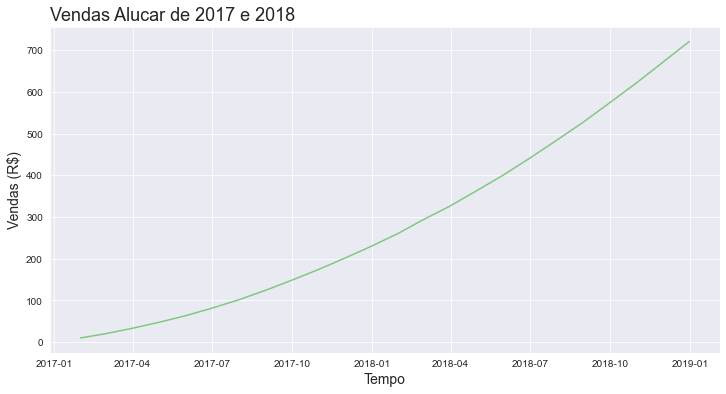

In [24]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax